<a href="https://colab.research.google.com/github/Inventor-creator/Steam-recommendations-predictor-thingy/blob/main/Predicting_Recommendations_Of_Steam_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np


In [160]:
import matplotlib.pyplot as plt


In [161]:
df = pd.read_csv('a_steam_data_2021_2025.csv')

In [162]:
len(df)

65521

In [163]:
df.head(10)

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues
5,1724980,The Lone Blade,2023,"May 23, 2023",Action;Adventure;Indie,Single-player;Full controller support;Family S...,1.99,0,Opia Games,Opia Games;Plug In Digital
6,3822820,Knight Crawler,2025,"Jul 16, 2025",Action;Indie;Free To Play,Single-player;Full controller support;Custom V...,0.00,0,Taylor Conolley,Taylor Conolley
7,3863460,No Sweet Looks,2025,"Aug 28, 2025",Action;Indie,Single-player;Steam Achievements;Full controll...,2.99,0,halvardo13,halvardo13
8,3216610,League Of Tacticians: Path of Tarkan,2025,"May 21, 2025",Adventure;RPG;Strategy,Single-player;Family Sharing,3.99,0,Oba Games,Oba Games
9,3057250,Pennylooter,2025,"Sep 8, 2025",Action;Indie,Single-player;Steam Achievements;Full controll...,6.99,0,Josh Sellers,Josh Sellers


In [164]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher'],
      dtype='object')

In [165]:
df.describe()

,appid,release_year,price,recommendations
count,6.552100e+04,65521.000000,65521.000000,65521.000000
mean,2.580607e+06,2023.453091,7.204043,362.165336
std,7.692480e+05,1.386641,16.914429,6936.837198
min,1.200220e+06,2021.000000,0.000000,0.000000
25%,1.916970e+06,2022.000000,0.990000,0.000000
50%,2.516050e+06,2024.000000,3.990000,0.000000
75%,3.193800e+06,2025.000000,9.740000,0.000000
max,4.243930e+06,2025.000000,1900.000000,862487.000000


In [166]:
df.dtypes

appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
dtype: object

In [167]:
df['recommendations'].unique()

array([   0,  240, 4858, ..., 3338, 7071, 3819], shape=(2536,))

In [168]:
df['developer'].unique()

array(['Bouncy Rocket Studios', 'Caramelo Studios', 'Libragames', ...,
       'KIKI GAMES', 'Xennial Digital', 'Rylan Yancey'],
      shape=(45680,), dtype=object)

In [169]:
df['publisher'].unique()

array(['Bouncy Rocket Studios', 'Caramelo Studios', 'Libragames', ...,
       'Xennial Digital', 'PoisonGames', 'Rylan Yancey'],
      shape=(41601,), dtype=object)

In [170]:
for i in df.columns:
  if df[i].isna().any():
    print(i)



genres
categories
developer
publisher


In [171]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher'],
      dtype='object')

In [172]:
recommendations = {}

for i in df.values:
  try:
    recommendations[i[2]] += i[6]
  except:
    recommendations[i[2]] = i[6]

In [173]:
recommendations.keys()

dict_keys([2024, 2025, 2023, 2021, 2022])

In [174]:
recommendations.values()

dict_values([120240.57000002546, 138910.94000002558, 88742.46000000965, 55477.5499999971, 68644.59999999695])

In [175]:
sortedRecs = {}

for i in sorted(recommendations):
  sortedRecs[i] = recommendations[i]

In [176]:
sortedRecs

{2021: 55477.5499999971,
 2022: 68644.59999999695,
 2023: 88742.46000000965,
 2024: 120240.57000002546,
 2025: 138910.94000002558}

In [177]:
recommendations

{2024: 120240.57000002546,
 2025: 138910.94000002558,
 2023: 88742.46000000965,
 2021: 55477.5499999971,
 2022: 68644.59999999695}

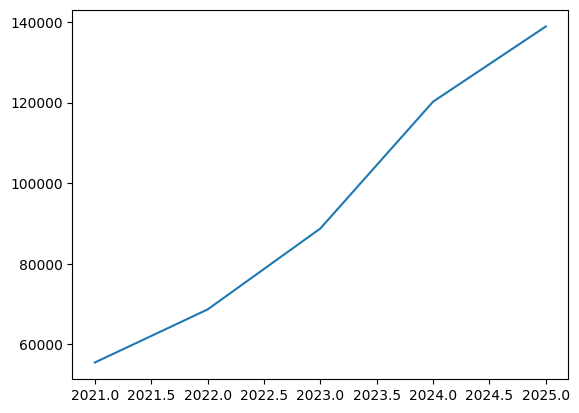

In [178]:
plt.plot(sortedRecs.keys() , sortedRecs.values())

In [179]:
for i in df['release_date']:
  print(i)

Streaming output truncated to the last 5000 lines.
Feb 15, 2021
Dec 13, 2024
Oct 11, 2024
Sep 28, 2023
Aug 27, 2025
Jul 31, 2024
Apr 17, 2025
May 25, 2022
Jan 22, 2024
Nov 6, 2024
Feb 1, 2024
Dec 3, 2025
Aug 7, 2025
Oct 22, 2024
Jul 15, 2022
Jun 20, 2024
Sep 8, 2023
Apr 5, 2024
May 17, 2023
Sep 19, 2025
Aug 30, 2024
Aug 29, 2025
Oct 4, 2024
Apr 13, 2023
Oct 12, 2022
Oct 5, 2021
Feb 26, 2021
Jul 7, 2023
Apr 9, 2025
Dec 16, 2023
Apr 10, 2024
December 2025
Aug 15, 2024
Mar 24, 2024
Sep 16, 2025
Apr 29, 2021
Jun 12, 2025
Sep 25, 2024
Aug 8, 2023
Apr 7, 2024
Nov 9, 2025
Sep 27, 2023
Aug 18, 2022
Jan 29, 2024
Mar 1, 2024
Nov 14, 2024
Nov 19, 2023
May 23, 2024
Feb 10, 2022
Mar 2, 2023
Nov 20, 2025
Mar 24, 2024
Oct 4, 2024
Feb 6, 2024
Feb 3, 2024
Dec 1, 2022
Jan 14, 2024
Mar 24, 2024
Jun 6, 2025
Feb 7, 2023
Oct 11, 2021
Oct 7, 2021
Dec 10, 2021
Jul 4, 2025
Jan 14, 2022
Oct 19, 2023
Jun 6, 2024
Jul 31, 2025
Sep 19, 2024
Jun 2, 2025
Feb 25, 2022
May 7, 2021
Feb 21, 2024
Jan 28, 2023
Aug 9, 2025


In [180]:
def ConvertDatetime(rows):
  months = {
      'Jan' : 1,
      'Feb' : 2,
      'Mar' : 3,
      'Apr' : 4,
      'May' : 5,
      'Jun' : 6,
      'Jul' : 7,
      'Aug' : 8,
      'Sep' : 9,
      'Oct' : 10,
      'Nov' : 11,
      'Dec' : 12,
      'Q4' : 10

  }

  dateArr = []
  monthArr = []

  for i in rows:
    spiltI = i.split(' ')

    try:
      dateArr.append(int(spiltI[1][:-1]))
      monthArr.append(months[spiltI[0]])

    except:
      if(len(dateArr) > len(monthArr)):
        monthArr.append(np.nan)
      else:
        dateArr.append(np.nan)
        monthArr.append(np.nan)


  return dateArr , monthArr


In [181]:
df['releaseDate'] , df['releaseMonth'] = ConvertDatetime(df['release_date'])

In [182]:
df.columns

Index(['appid', 'name', 'release_year', 'release_date', 'genres', 'categories',
       'price', 'recommendations', 'developer', 'publisher', 'releaseDate',
       'releaseMonth'],
      dtype='object')

In [183]:
df.dtypes

appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
releaseDate        float64
releaseMonth       float64
dtype: object

In [184]:
df.shape

(65521, 12)

In [185]:
df.dropna(subset=['releaseDate' , 'releaseMonth'] , inplace=True)

In [186]:

recommendationMonthly = {}

for i in df.values:
  try:
    recommendationMonthly[i[-1]] += i[6]
  except:
    recommendationMonthly[i[-1]] = i[6]


In [187]:
sortedRecsMonthly = {}

for i in sorted(recommendationMonthly):
  sortedRecsMonthly[i] = recommendationMonthly[i]

In [188]:
sortedRecsMonthly

{1.0: 30246.560000001973,
 2.0: 35038.81000000201,
 3.0: 38801.57000000096,
 4.0: 36900.01000000146,
 5.0: 40816.49000000057,
 6.0: 36874.02000000147,
 7.0: 39573.46000000097,
 8.0: 39910.89000000061,
 9.0: 41768.73000000076,
 10.0: 50631.07999999878,
 11.0: 48411.45999999882,
 12.0: 33043.04000000237}

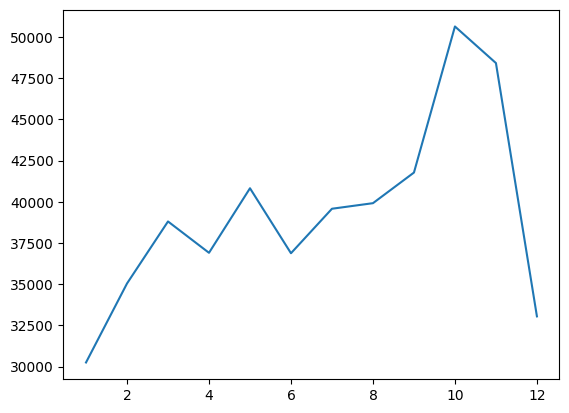

In [192]:
plt.plot(sortedRecsMonthly.keys() ,sortedRecsMonthly.values() , scalex=True )